In [1]:
# pendul - Program to compute the motion of a simple pendulum using the Euler or Verlet method
# by Garcia with modifications by Thang Tran
from pylab import *

This program is modified to solve the ordinary differential equation of a damped pendulum. The program then uses vpython to simulate the motion of the pendulum. Equation of motion of a simple damped pendulum, 
$$\frac{d^2\theta}{dt^2} = -\frac{g}{l}sin\theta - q\frac{d\theta}{dt}$$
$$\frac{d\omega}{dt} = -\frac{g}{l}sin\theta - q\omega $$
$$\rightarrow \frac{d\omega}{dt}=\alpha(\theta) = -\frac{g}{l}sin\theta - q\omega,\space \frac{d\theta}{dt} = \omega $$

In [2]:
#* Loop over desired number of steps with given time step
#    and numerical method
def damped_os(q):
    # Choose the numerical method
    NumericalMethod = 2
    #* Set initial position and velocity of pendulum
    theta0 = 40
    theta = radians(theta0)         # Convert angle to radians
    omega = 0.0                     # Set the initial velocity
    #* Set the physical constants and other variables
    g_over_L = 1.0            # The constant g/L
    time = 0.0                # Initial time
    irev = 0                  # Used to count number of reversals                                
    dt = 0.05                  #Chose time step

    #* Take one backward step to start Verlet
    accel = -g_over_L * sin(theta)    # Gravitational acceleration
    theta_old = theta - omega*dt + 0.5*accel*dt**2  

    nstep = 1000  # Choose number of steps
    t_plot = empty(nstep)
    th_plot = empty(nstep)
    period = empty(nstep)   # Used to record period estimates
    for istep in range(nstep):  

        #* Record angle and time for plotting
        t_plot[istep] = time            
        th_plot[istep] = degrees(theta)  # Convert angle to degrees
        time += dt

        #* Compute new position and velocity using 
        #    Euler or Verlet method
    #     accel = -g_over_L * sin(theta)   # Gravitational acceleration
        accel = -g_over_L * sin(theta)-q*omega
        if NumericalMethod == 1 :
            theta_old = theta               # Save previous angle
            theta += dt*omega               # Euler method
            omega += dt*accel 
        else:
            omega = (theta - theta_old)/(2*dt)
            theta_new = 2*theta - theta_old + dt**2 * accel
            theta_old = theta               # Verlet method
            theta = theta_new
        #print(degrees(theta))
        #* Test if the pendulum has passed through theta = 0;
        #    if yes, use time to estimate period
        if theta*theta_old < 0 :  # Test position for sign change
#             print('Turning point at time t = %.2f ' % time)
            if irev == 0 :          # If this is the first change,
                time_old = time     # just record the time
            else:
                period[irev-1] = 2*(time - time_old)
                time_old = time
            irev = irev + 1     # Increment the number of reversals
    return t_plot, th_plot


In [3]:
rcParams.update({'font.size': 20})

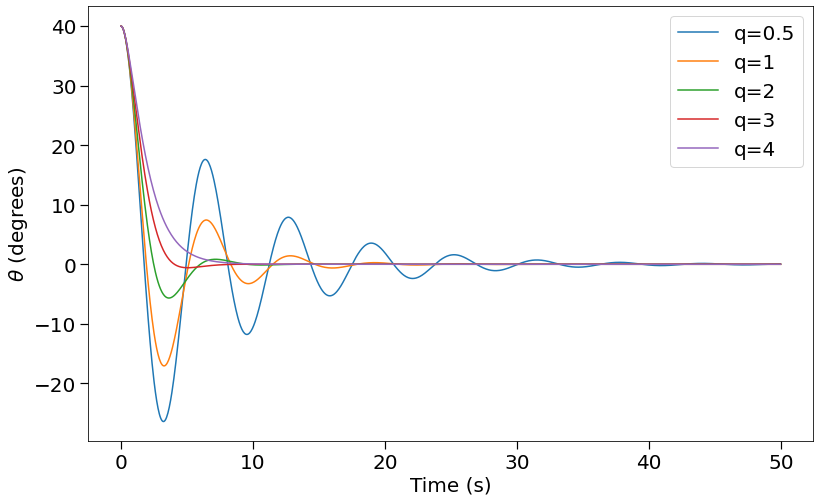

In [4]:
fig1 = figure(figsize=(13,8))
for q in [0.5,1,2,3,4]:
    t_plot, th_plot = damped_os(q)
    # Graph the oscillations as theta versus time
    # plot(t_plot, th_small, '--',c='C2',label='small angle approx')
    plot(t_plot, th_plot, '-', label = 'q=' +str(q))
    xlabel('Time (s)')
    ylabel(r'$\theta$ (degrees)')
    plt.tick_params('both', length=8, width=1.2, which='major') # bigger axis ticks
legend()
show()


The transition from underdamped to overdamped seems to happen around q = 2.0

In [5]:
from vpython import sphere, rate, vector, color, box
t_plot, th_plot = damped_os(0.1)
# The starting angle is 40 degrees
theta0 = radians(40)
x_init = 10*sin(theta0)
y_init = 10*(1-cos(theta0))
ball = sphere (pos=vector(0,0,0), radius=0.8, color=color.green)
line = box (pos = vector(0,5,0), length=0.3, height=10, width=0.3, color=color.red)
line.rotate(angle=theta0, axis=vector(0,0,1), origin = vector(0,10,0))

for i in range(len(th_plot)-1):
    rate(50)
    x = 10*np.sin(radians(th_plot[i]))
    y = 10*(1 - np.cos(radians(th_plot[i])))
    ball.pos = vector(x,y,0)
    th_dif = th_plot[i+1] - th_plot[i]
    line.rotate(angle=radians(th_dif), axis=vector(0,0,1), origin = vector(0,10,0))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>